In [44]:
# Setup
!pip install --quiet --upgrade pip

# Install the dependencies.
!pip install --quiet -r requirements.txt

# Restart the runtime by ending the process.
exit()

In [2]:
import numpy as np
import pandas as pd
from serving.data import get_varied_labels, get_labels
from importlib import reload


In [8]:
df = get_labels()
df["year"] = pd.to_numeric(df["year"])
df["log_target"] = np.log(df["target"])

In [10]:
df.describe()

,year,target,log_target
count,10246.000000,10246.000000,10246.000000
mean,2019.032403,157.151464,5.021645
std,2.025249,37.482781,0.286243
min,2016.000000,19.800000,2.985682
25%,2017.000000,133.900000,4.897093
50%,2019.000000,162.150000,5.088522
75%,2021.000000,184.400000,5.217107
max,2022.000000,270.200000,5.599162


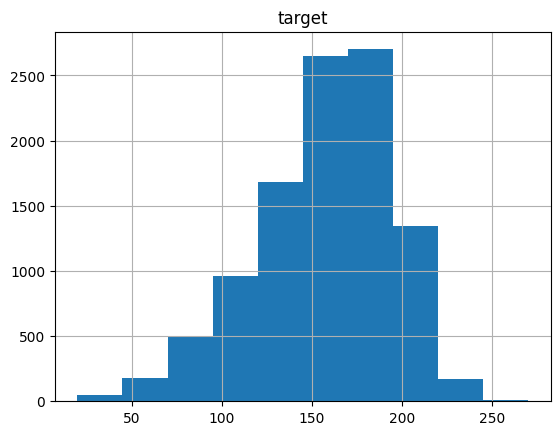

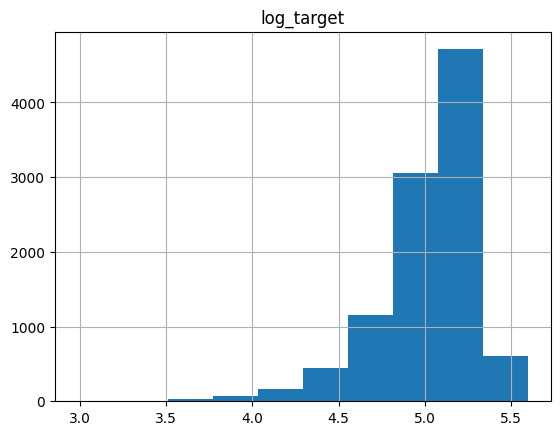

In [9]:
columns = ["target", "log_target"]

for col in columns:
    df.hist(col)

In [98]:
mean_per_county = labels_df.groupby("county_name")["target"].mean()
mean_per_state = labels_df.groupby("state_name")["target"].mean()

print(mean_per_county.head())
print(mean_per_state.head())

print(labels_df.describe())

county_name
ACCOMACK    155.071429
ADA         220.920000
ADAIR       170.050000
ADAMS       149.251724
AIKEN       136.575000
Name: target, dtype: float64
state_name
ALABAMA       139.969737
ARKANSAS      177.167232
CALIFORNIA    177.717241
COLORADO      126.891818
DELAWARE      167.557143
Name: target, dtype: float64
             target
count  10246.000000
mean     157.151464
std       37.482781
min       19.800000
25%      133.900000
50%      162.150000
75%      184.400000
max      270.200000


In [3]:
df_varied = get_varied_labels(0, 2000)

In [17]:

pd.set_option('display.max_colwidth', 20)

In [34]:
df_varied[df_varied["county_name"]=="SUTTER"]

,year,state_ansi,county_ansi,county_name
0,2016,06,101,SUTTER
1,2018,06,101,SUTTER
2,2019,06,101,SUTTER
3,2021,06,101,SUTTER
4,2022,06,101,SUTTER
